In [1]:
pip install pandas unicode matplotlib seaborn scikit-learn plotly & pip install --upgrade nbformat


   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.5 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.5 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.5 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.5 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.5 kB ? eta -:--:--
   ------------------------------- -------- 61.4/78.5 kB 234.9 kB/s eta 0:00:01
   ------------------------------- -------- 61.4/78.5 kB 234.9 kB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 208.0 k

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\OneDrive\\Documents\\Eduardo Toledo\\MIAD\\final_project\\source\\.venv\\Lib\\site-packages\\~bformat-5.10.3.dist-info'
Check the permissions.



# 1. Histograms of consumption variables and anlsyses of Kutorsis and Skewness

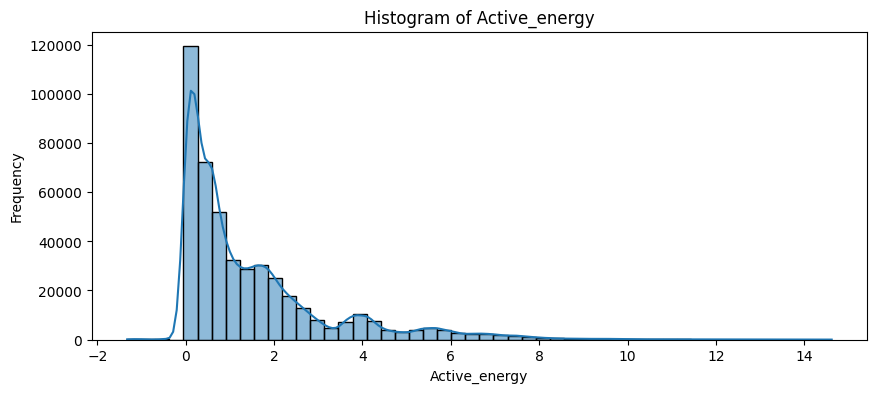

Kurtosis for Active_energy
3.8569409587771544

Skewness forActive_energy
1.8908851389124715


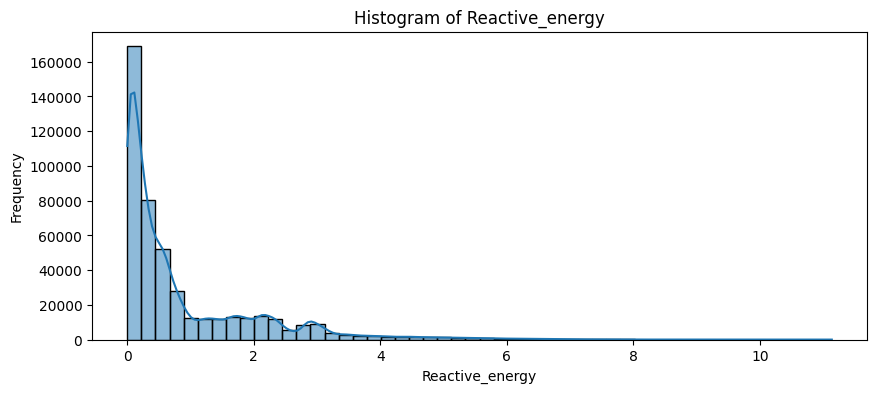

Kurtosis for Reactive_energy
5.145997275021085

Skewness forReactive_energy
2.1068404047718476


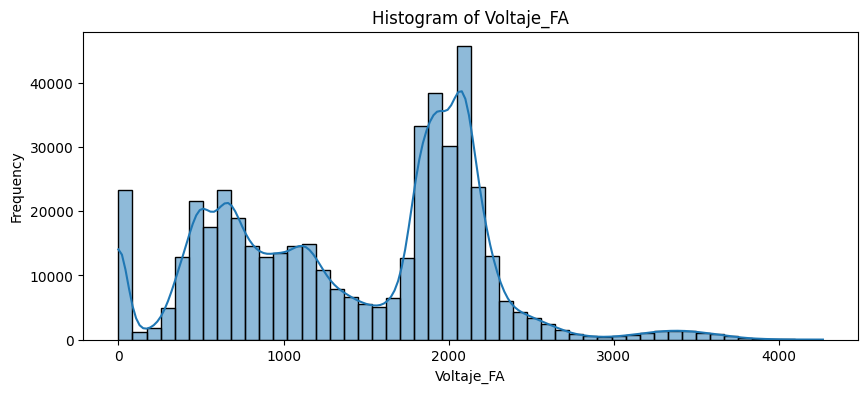

Kurtosis for Voltaje_FA
-0.6349410898737275

Skewness forVoltaje_FA
-0.0177407741845082


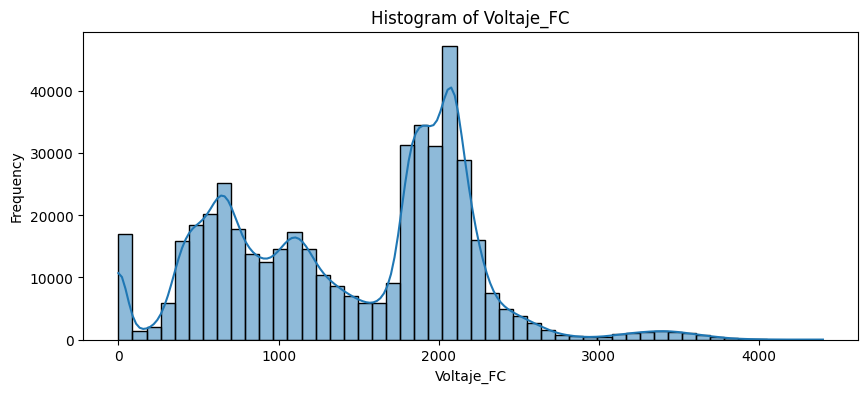

Kurtosis for Voltaje_FC
-0.6041382073606223

Skewness forVoltaje_FC
-0.011772950616440408


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

combined_df = pd.read_csv('../data/output/consumo_datamart_bronze.csv')
variables = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']

for var in variables:
    plt.figure(figsize=(10, 4))
    sns.histplot(combined_df[var], bins=50, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    
    kurtosis = combined_df[var].kurtosis()
    skewness = combined_df[var].skew()

    print(f"Kurtosis for {var}")
    print(kurtosis)
    print(f"\nSkewness for{var}")
    print(skewness)

# 2. Relations between consumption variables  and economical sector and clients

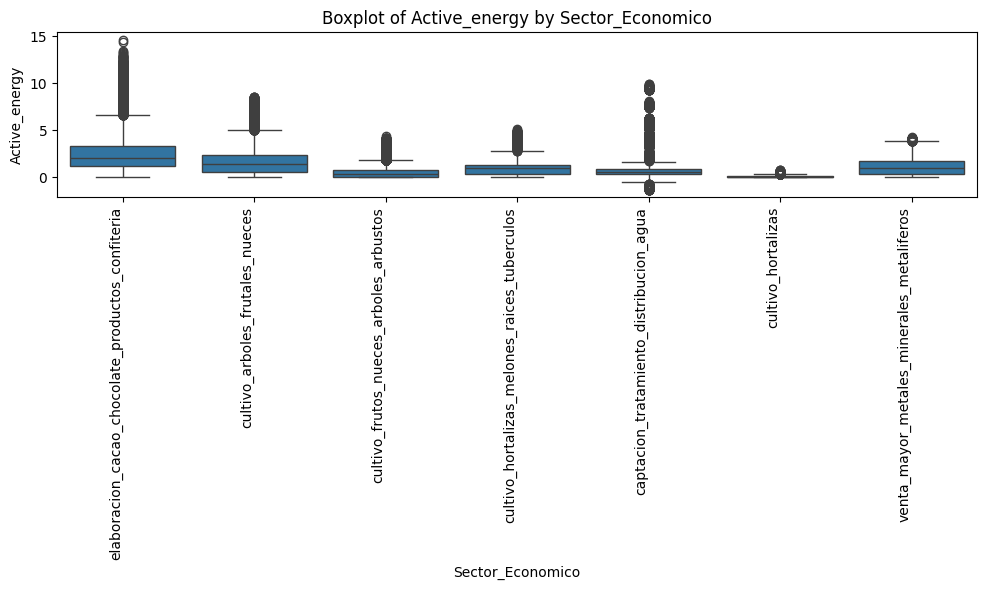

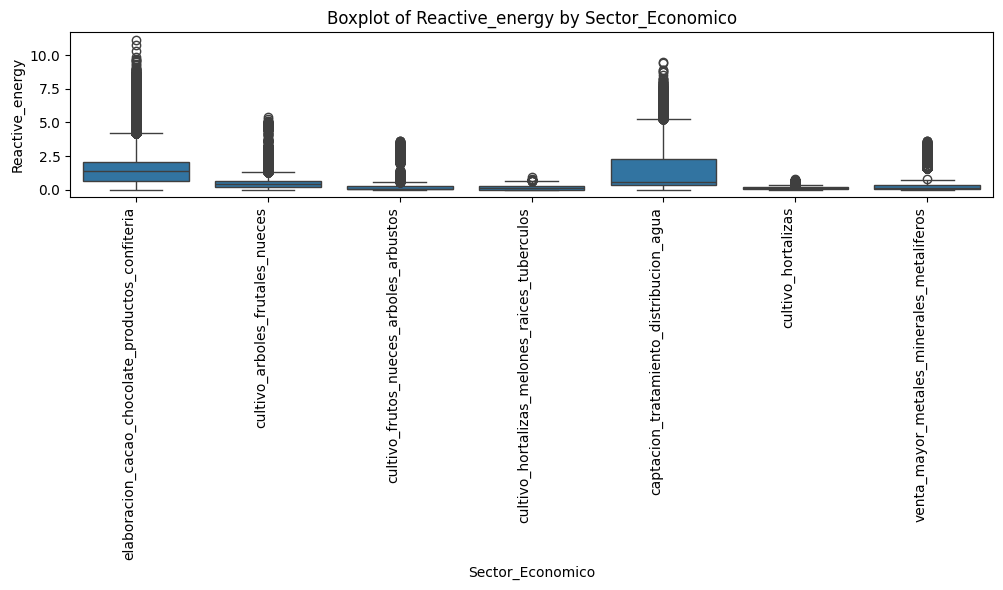

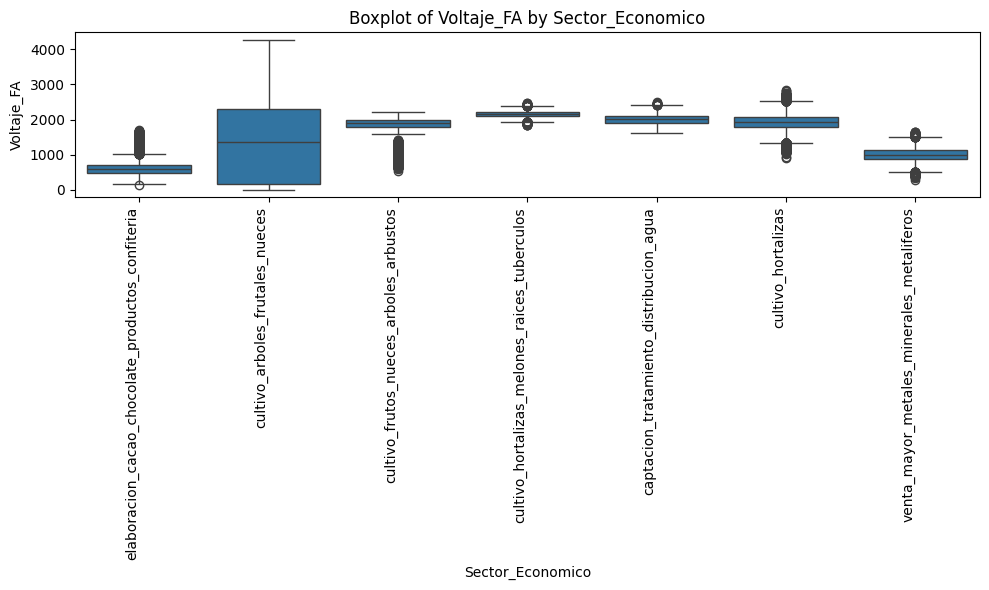

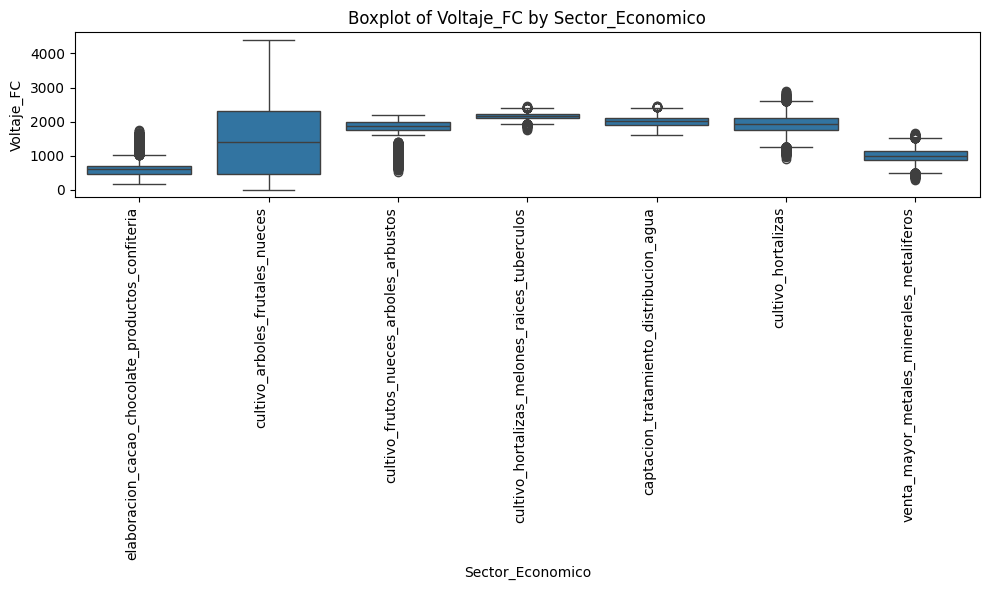

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

combined_df = pd.read_csv('../data/output/consumo_datamart_bronze.csv')
variables = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Sector_Economico', y=var, data=combined_df)
    plt.title(f'Boxplot of {var} by Sector_Economico')
    plt.xticks(rotation=90, ha='right',fontsize=10)  #
    plt.tight_layout()  
    plt.show()

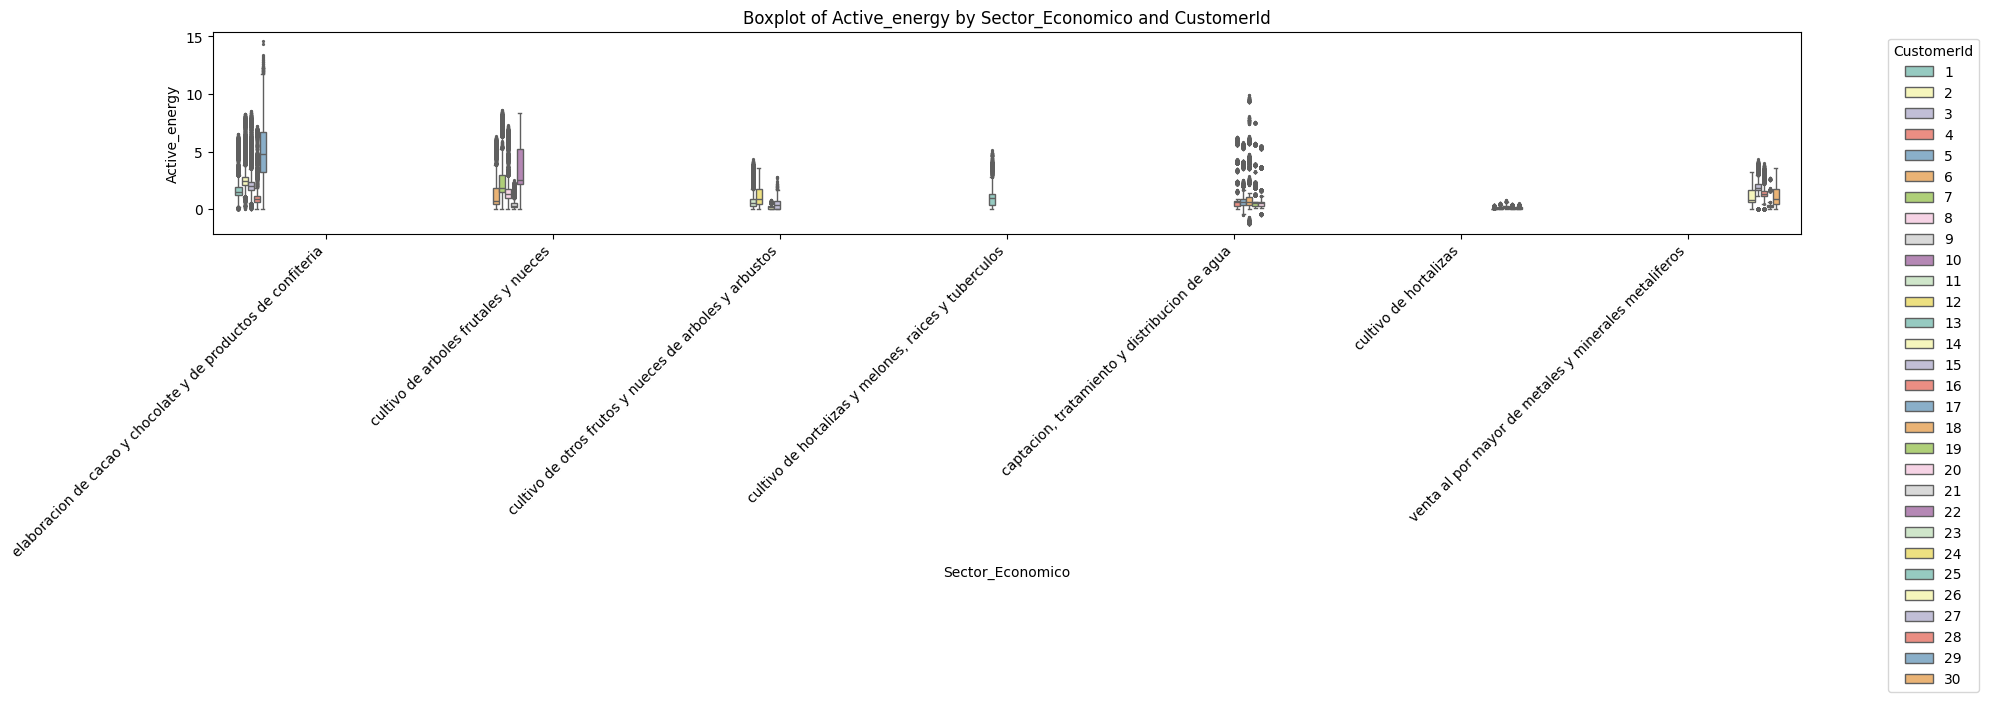

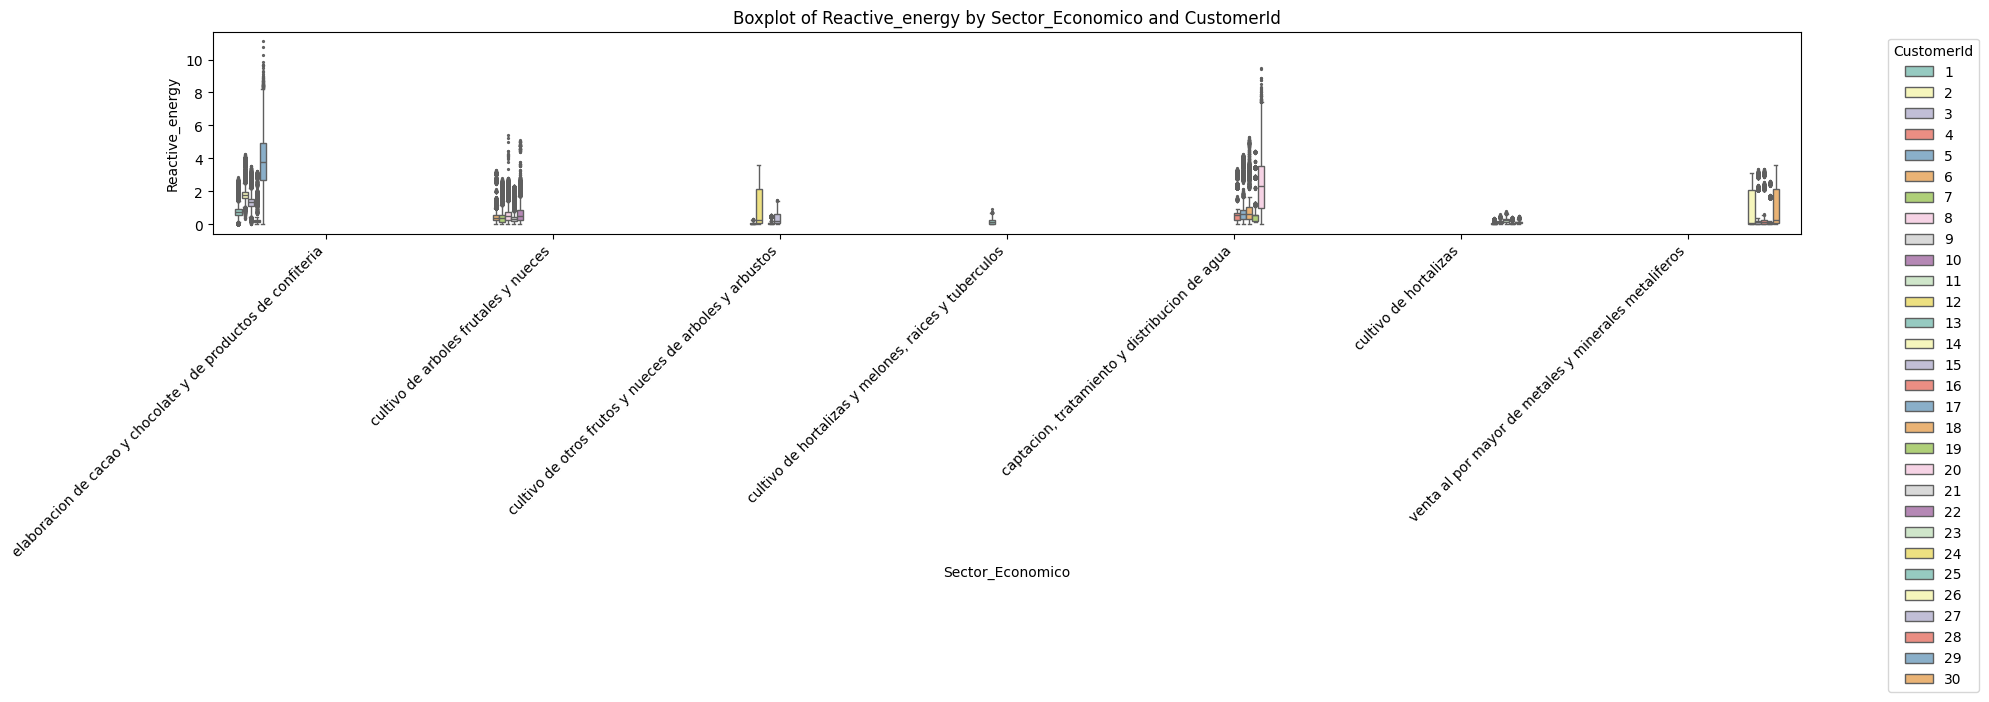

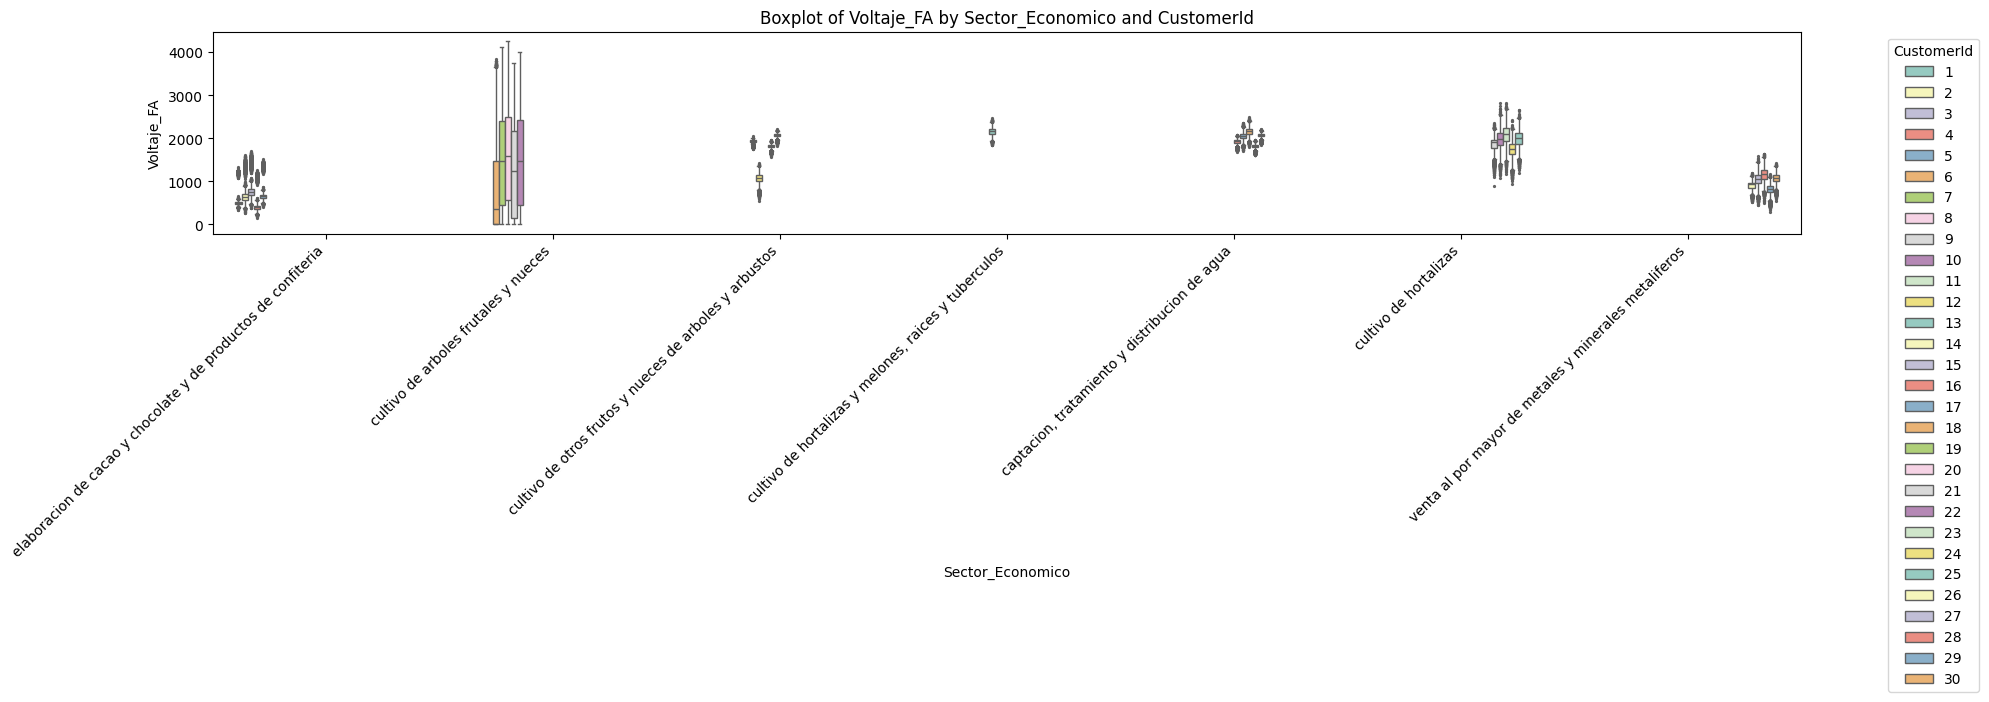

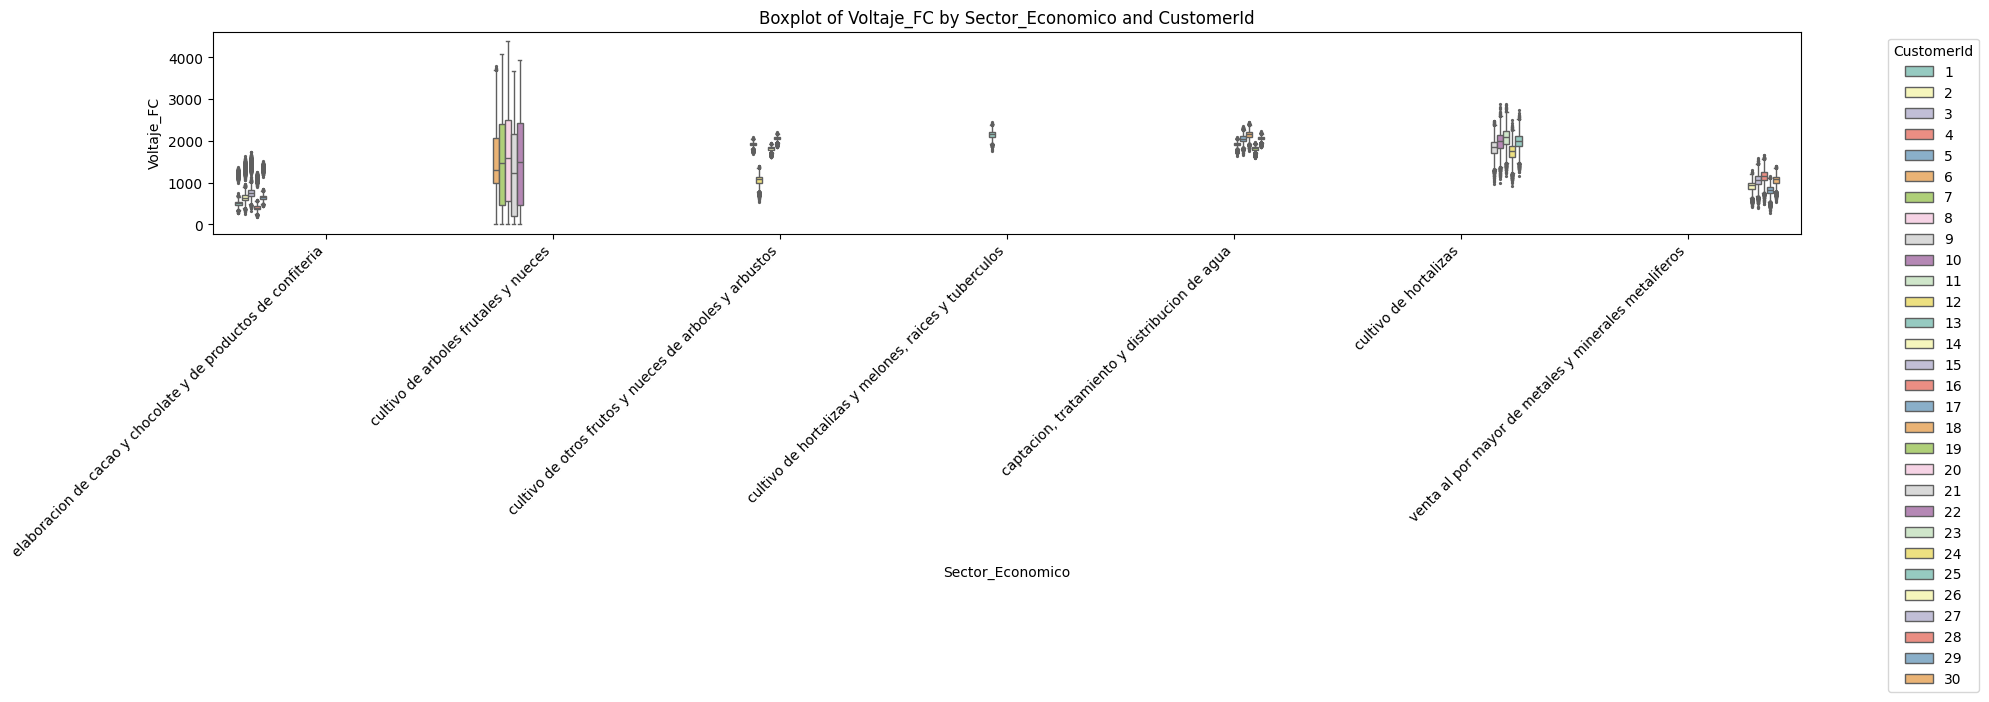

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

combined_df = pd.read_csv('../data/output/consumo_datamart_bronze.csv')

variables = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']

for var in variables:
    plt.figure(figsize=(20, 6))  
    sns.boxplot(x='Sector_Economico', y=var, hue='CustomerId', data=combined_df, palette="Set3", fliersize=1.3)
    plt.title(f'Boxplot of {var} by Sector_Economico and CustomerId')
    plt.xticks(rotation=45, ha='right', fontsize=10)  
    plt.legend(title='CustomerId', bbox_to_anchor=(1.05, 1), loc='upper left')  #
    plt.tight_layout()  
    plt.show()

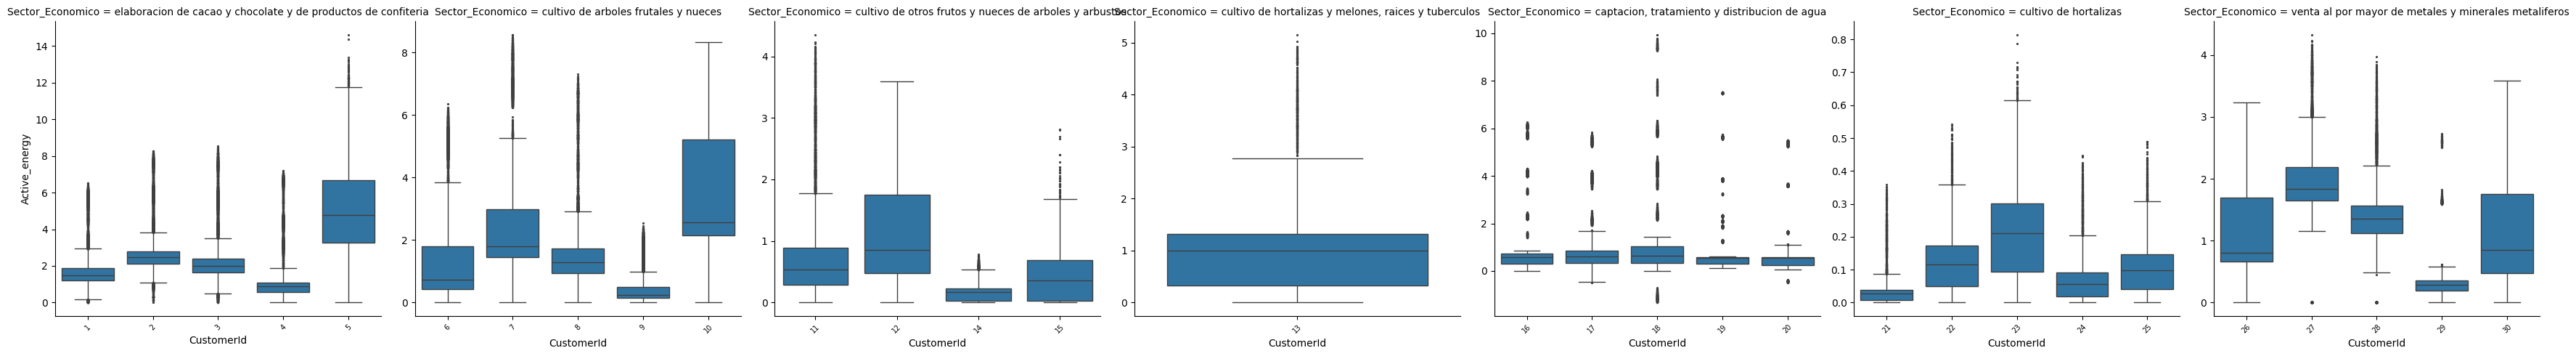

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

combined_df = pd.read_csv('../data/output/consumo_datamart_bronze.csv')

variable = 'Active_energy'

g = sns.FacetGrid(combined_df, col='Sector_Economico', col_wrap=7, sharex=False, sharey=False, height=5)
g.map_dataframe(sns.boxplot, x='CustomerId', y=variable, showfliers=True, flierprops={'markersize': 1.3})

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  
        label.set_fontsize(7)  
    ax.set_xlabel('CustomerId')  

plt.tight_layout()
plt.show()


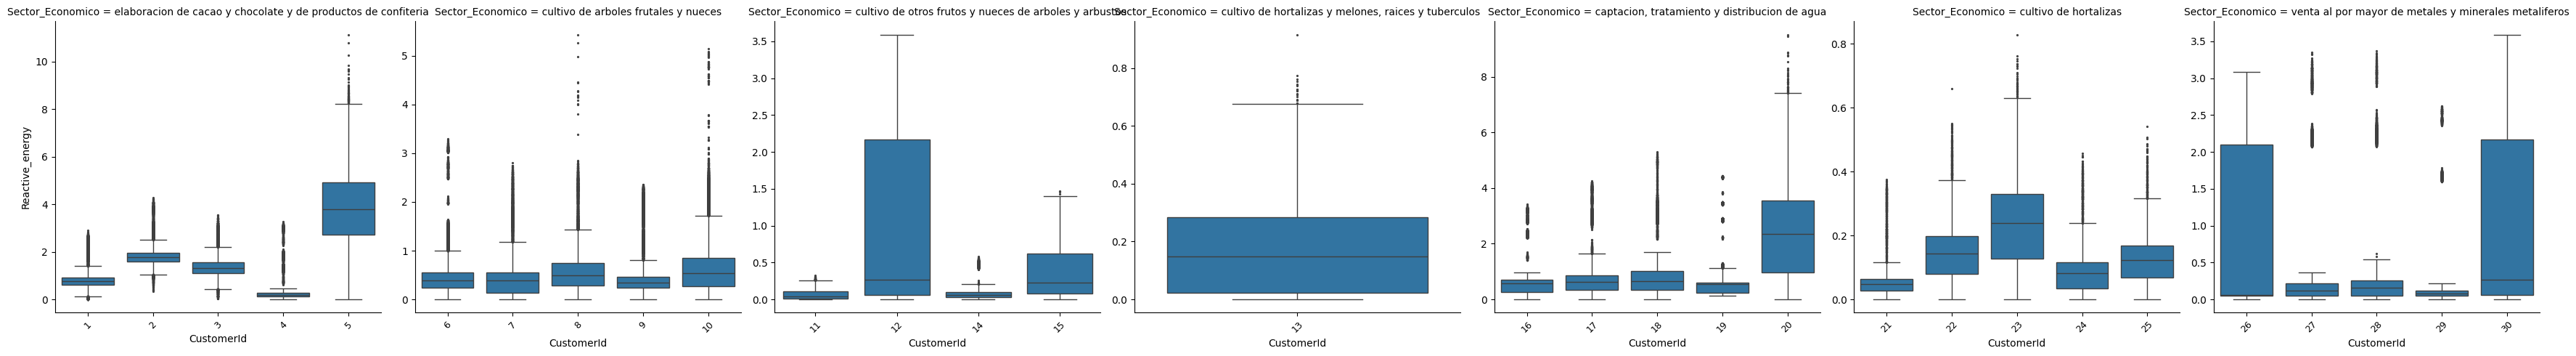

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

combined_df = pd.read_csv('../data/output/consumo_datamart_bronze.csv')

variable = 'Reactive_energy'

g = sns.FacetGrid(combined_df, col='Sector_Economico', col_wrap=7, sharex=False, sharey=False, height=5)
g.map_dataframe(sns.boxplot, x='CustomerId', y=variable, showfliers=True, flierprops={'markersize': 1.3})


for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  
        label.set_fontsize(9)  
    ax.set_xlabel('CustomerId') 

plt.tight_layout()
plt.show()


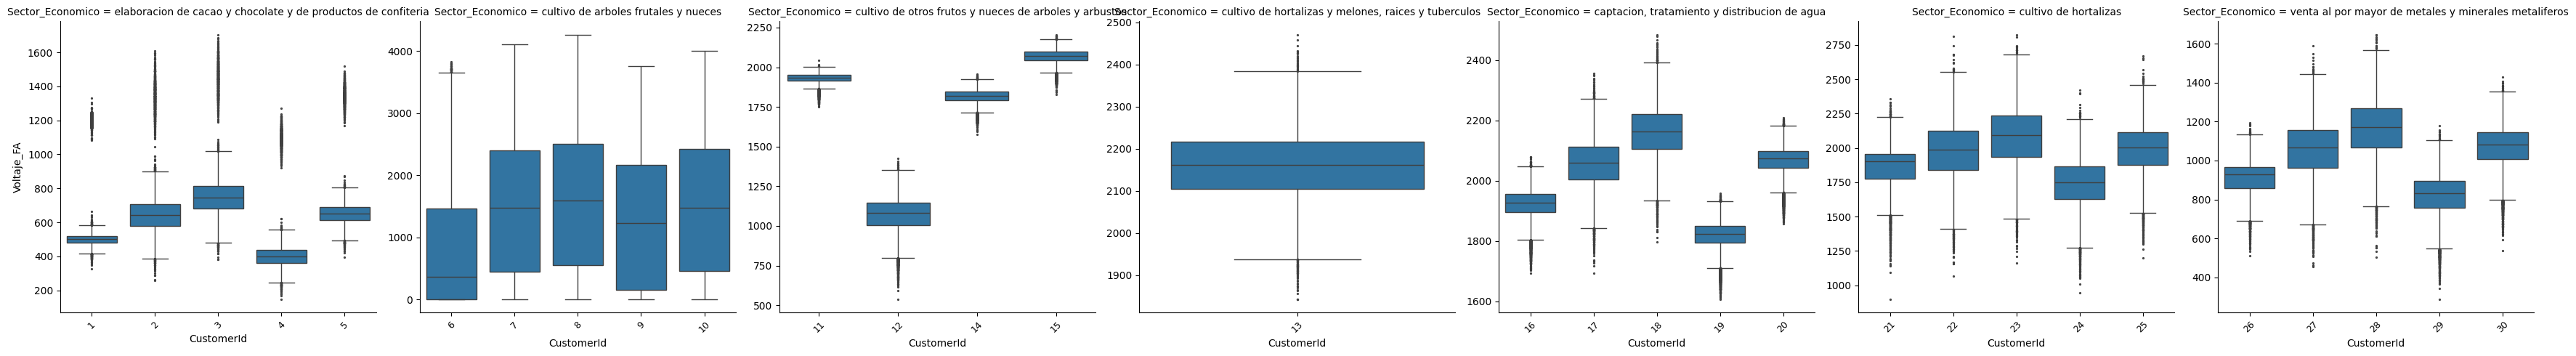

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

combined_df = pd.read_csv('../data/output/consumo_datamart_bronze.csv')

variable = 'Voltaje_FA'

g = sns.FacetGrid(combined_df, col='Sector_Economico', col_wrap=7, sharex=False, sharey=False, height=5)
g.map_dataframe(sns.boxplot, x='CustomerId', y=variable, showfliers=True, flierprops={'markersize': 1.3})

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  
        label.set_fontsize(9)  
    ax.set_xlabel('CustomerId')  
plt.tight_layout()
plt.show()


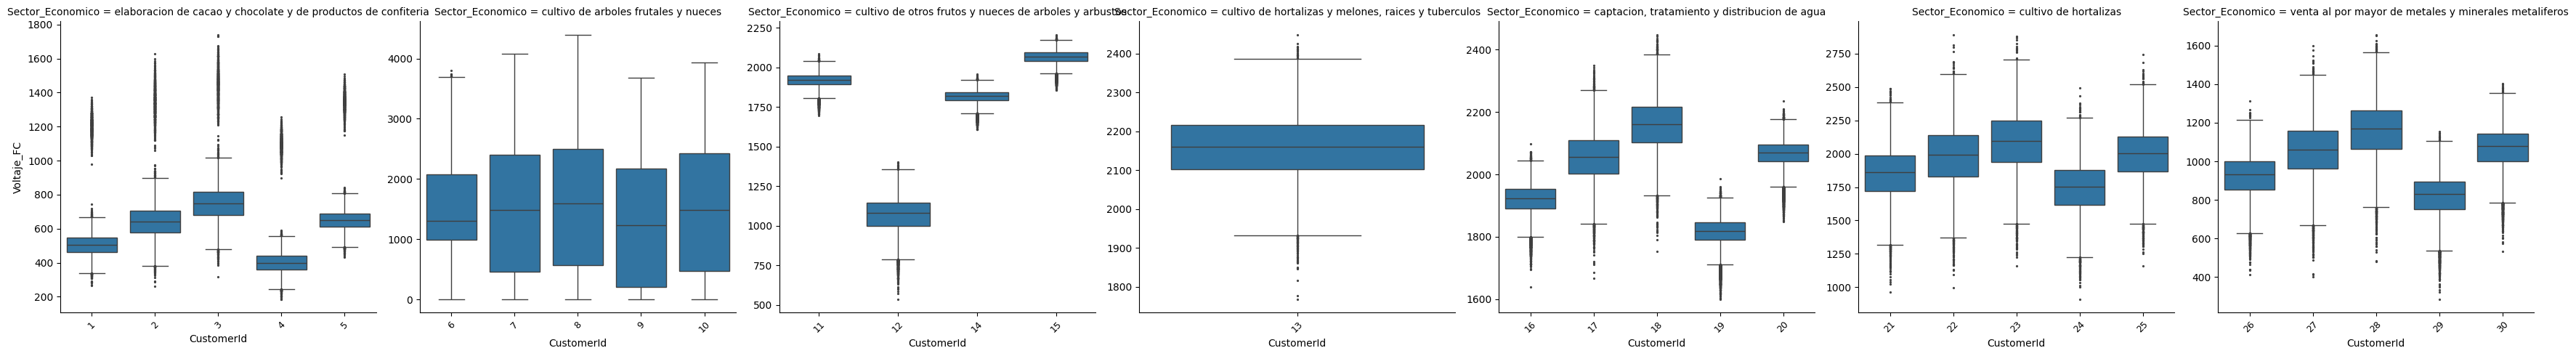

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Load  data
combined_df = pd.read_csv('../data/output/consumo_datamart_bronze.csv')

# Example variable to plot
variable = 'Voltaje_FC'

# Create a FacetGrid to generate a grid of plots based on 'Sector_Economico'
g = sns.FacetGrid(combined_df, col='Sector_Economico', col_wrap=7, sharex=False, sharey=False, height=5)
g.map_dataframe(sns.boxplot, x='CustomerId', y=variable, showfliers=True, flierprops={'markersize': 1.3})

# Iterate over axes to set custom labels and adjustments
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels for better readability
        label.set_fontsize(9)  # Set a smaller font size
    ax.set_xlabel('CustomerId')  # Set x-axis label

plt.tight_layout()
plt.show()


# 2.1 Applying MinMaxScaler to escalte the magnitudes in order to create the radar diagrams

In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

combined_df = pd.read_csv('../data/output/consumo_datamart_bronze.csv')

columns_to_scale = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']
data_to_scale = combined_df[columns_to_scale]

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(data_to_scale)

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

combined_df[columns_to_scale] = scaled_df

output_filepath = '../data/output/consumo_datamart_bronze_maxminscaler.csv'
combined_df.to_csv(output_filepath, index=False)




# 3. Radar Diagrams of consumption variables

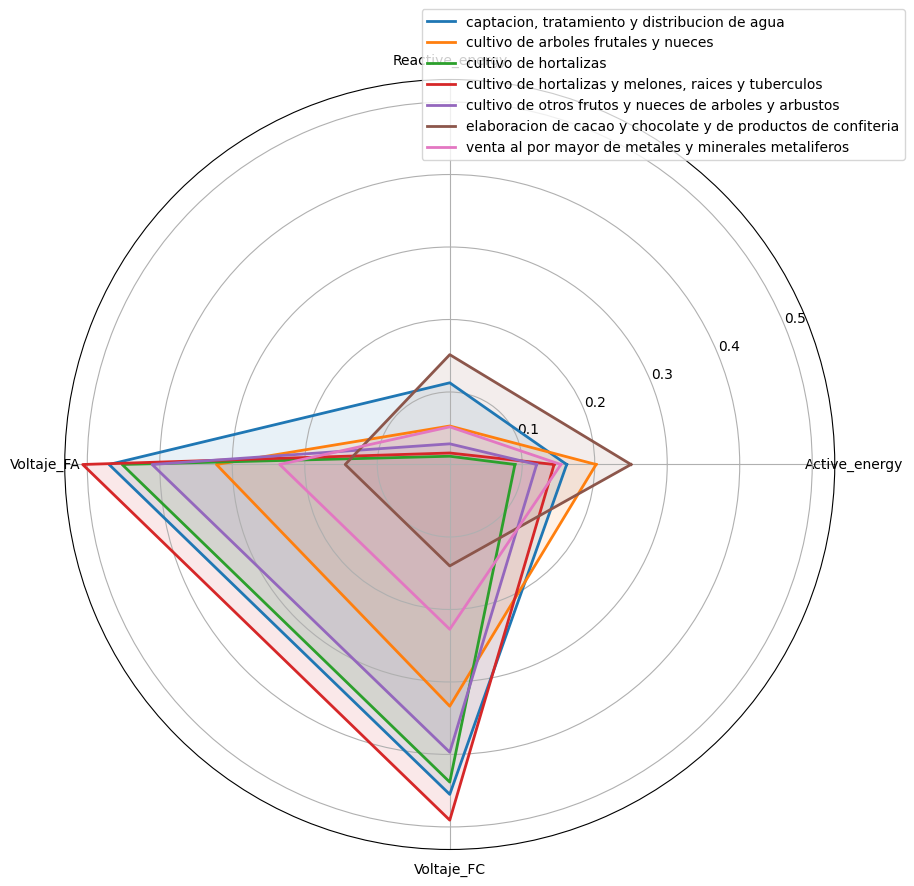

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi


combined_df = pd.read_csv('../data/output/consumo_datamart_bronze_maxminscaler.csv')

cols = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']

sector_means = combined_df.groupby('Sector_Economico')[cols].mean().reset_index()

N = len(cols)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], cols)

for index, row in sector_means.iterrows():
    values = row[cols].values.flatten().tolist()
    values += values[:1]  
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['Sector_Economico'])
    ax.fill(angles, values, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


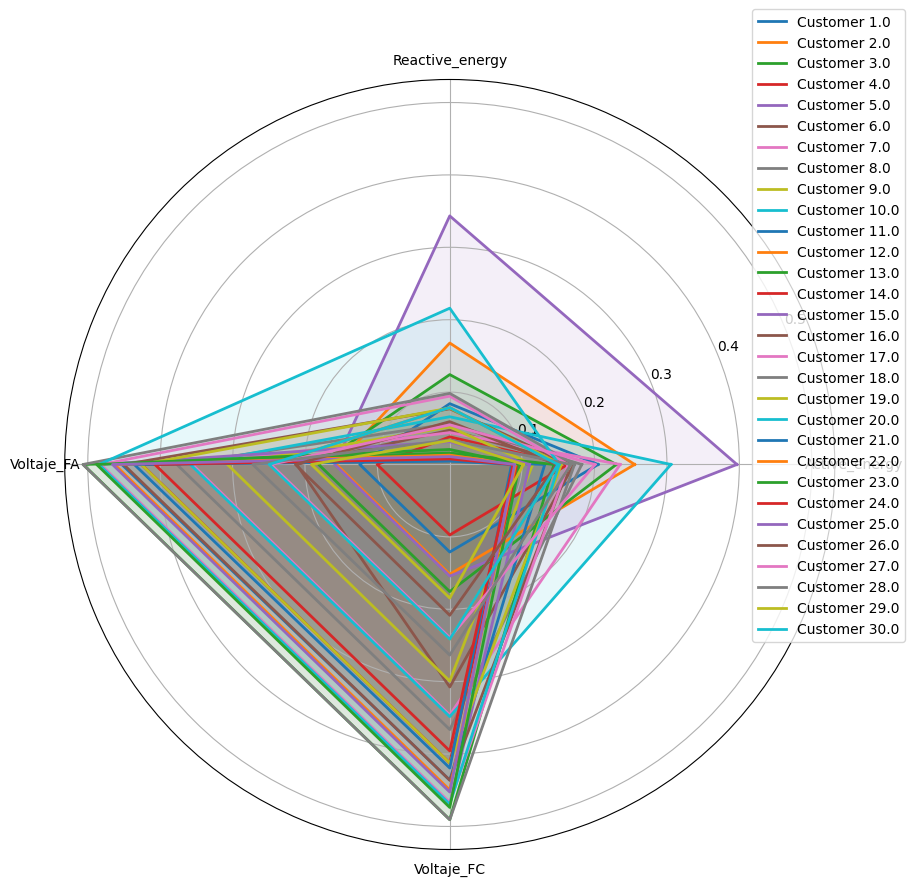

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

combined_df = pd.read_csv('../data/output/consumo_datamart_bronze_maxminscaler.csv')

categories = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']

customer_means = combined_df.groupby('CustomerId')[categories].mean().reset_index()

N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories)

for index, row in customer_means.iterrows():
    values = row[categories].values.flatten().tolist()
    values += values[:1]  # Closing the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Customer {row["CustomerId"]}')
    ax.fill(angles, values, alpha=0.1)


plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [14]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

combined_df = pd.read_csv('../data/output/consumo_datamart_bronze_maxminscaler.csv')

categories = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']

customer_means = combined_df.groupby('CustomerId')[categories].mean().reset_index()

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  

fig = go.Figure()

for index, row in customer_means.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[categories].tolist() + row[categories].tolist()[:1], 
        theta=categories + categories[:1],  
        fill='toself',
        name=f'Customer {row["CustomerId"]}'
    ))


fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  
        )),
    showlegend=True,
    title="Radar Chart of Customer Averages",
    width=1000,  
    height=900  
   

)

fig.show()


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



combined_df = pd.read_csv('../data/output/consumo_datamart_bronze.csv')
combined_df.describe()


stats_by_cliente = combined_df.groupby('ClienteId').describe()

stats_by_cliente.columns = ['_'.join(col).strip() for col in stats_by_cliente.columns.values]

stats_by_cliente.reset_index(inplace=True)

print(stats_by_cliente)


    ClienteId  Active_energy_count  Active_energy_mean  Active_energy_std  \
0           1              19681.0            1.940788           1.449246   
1           2              19681.0            2.745060           1.368205   
2           3              19681.0            2.341707           1.458767   
3           4              19681.0            1.270241           1.395533   
4           5              19681.0            4.998897           2.440656   
5           6              19681.0            1.407520           1.571658   
6           7              19681.0            2.426154           1.791167   
7           8              19681.0            1.579517           1.229197   
8           9              19681.0            0.496010           0.581122   
9          10              19681.0            3.545042           1.854900   
10         11              14000.0            0.763829           0.791581   
11         12              11415.0            1.054128           0.793689   